# <center><b><u><span style="color:#ff6600">Building a Next Best Action model for Standard Bank</span></u></b></center>

<center><img src="https://d9seco0wfq8yu.cloudfront.net/thumb/maker/8m44Ap1VON.jpeg" alt="Image" width="1200" height="500"></center>


### <center><u><b><span style="color:#ff6600">Problem Statement</span></b></u></center>
Modern customer analytics and personalization systems use a wide variety of methods that help to reveal and quantify customer preferences and intent, making marketing messages, ads, offers, and recommendations more relevant and engaging. However, most of these methods are designed to optimize only one immediate interaction with a customer and use objective functions defined through metrics like a `click-through rate (CTR)` or `conversion rate (CR)`. This problem can be particularly important in industries like retail banking and telecom where customer relationships evolve over long periods of time.

`In this project we must combine high performing classification engine with recommendation engine. 
This Project consists of two stages:`
- Stage-1: **Classification Engine:** Create High Performing Classification Engine(Which Classifies Churn customer or non-churn customer based on data provided)
- Stage-2: **Recommendation Engine:** Create a dummy dataset related to Types of Churn customers and right product recommendation to make them non churn customers. 

Note1: `Recommendations need to increase more conversion rate, so we can convert churn customers into non-churn customers.`

Note2: `With improper classification engine, we can make this Next Best Action project successful. So, make sure classification engine going to give high quality performance.`



### <center><u><b><span style="color:#ff6600">Aim</span></b></u></center>
* To classify the potential `churn customers` based on `numerical` and `categorical features`.
* It is a `binary classification` problem for an `imbalanced dataset`.



### <center><b><u><span style="color:#ff6600">DATASET DESCRIPTION</span></u></b></center>
1. `CIF`: Customer Identification Number, a unique identifier assigned to each customer.
2. `CUS_DOB`: Customer Date of Birth, indicating the birthdate of the customer.
3. `AGE`: Age of the customer, derived from the date of birth.
4. `CUS_Month_Income`: Monthly income of the customer.
5. `CUS_Gender`: Gender of the customer (e.g., Male, Female).
6. `CUS_Marital_Status`: Marital status of the customer (e.g., Single, Married, Divorced).
7. `CUS_Customer_Since`: Date since the customer has been associated with the bank.
8. `YEARS_WITH_US`: Number of years the customer has been with the bank.
9. `# total debit transactions for S1`: Number of debit transactions in the first quarter (S1).
10. `# total debit transactions for S2`: Number of debit transactions in the second quarter (S2).
11. `# total debit transactions for S3`: Number of debit transactions in the third quarter (S3).
12. `total debit amount for S1`: Total amount debited in the first quarter (S1).
13. `total debit amount for S2`: Total amount debited in the second quarter (S2).
14. `total debit amount for S3`: Total amount debited in the third quarter (S3).
15. `# total credit transactions for S1`: Number of credit transactions in the first quarter (S1).
16. `# total credit transactions for S2`: Number of credit transactions in the second quarter (S2).
17. `# total credit transactions for S3`: Number of credit transactions in the third quarter (S3).
18. `total credit amount for S1`: Total amount credited in the first quarter (S1).
19. `total credit amount for S2`: Total amount credited in the second quarter (S2).
20. `total credit amount for S3`: Total amount credited in the third quarter (S3).
21. `total debit amount`: Total amount debited across all quarters.
22. `total debit transactions`: Total number of debit transactions across all quarters.
23. `total credit amount`: Total amount credited across all quarters.
24. `total credit transactions`: Total number of credit transactions across all quarters.
25. `total transactions`: Total number of transactions (both debit and credit) across all quarters.
26. `CUS_Target`: Target variable indicating the status or behavior of the customer.
27. `TAR_Desc`: Description of the target variable.
28. `Status`: Additional status or information related to the customer.


### <center><b><u><span style="color:#ff6600">IMPORTING LIBRARIES</span></u></b></center>

In [1]:
from colorama import Fore 
print(Fore.YELLOW+"\n... IMPORTS STARTING ...\n")

print("\n\tVERSION INFORMATION")
import sys
sys.path.append("../src/")
import os
import random
import pandas as pd; print(f"\t\t- PANDAS VERSION: {pd.__version__}")
import matplotlib; print(f"\t\t- MATPLOTLIB VERSION: {matplotlib.__version__}")
import matplotlib.pyplot as plt
import seaborn as sns; print(f"\t\t- SEABORN VERSION: {sns.__version__}")
import pandas as pd; pd.options.mode.chained_assignment = None;
import numpy as np; print(f"\t\t– NUMPY VERSION: {np.__version__}");
import sklearn; print(f"\t\t– SKLEARN VERSION: {sklearn.__version__}");
import scipy; print(f"\t\t– scipy VERSION: {scipy.__version__}");
from scipy.stats import skew
from colorama import Fore 
import warnings

# my python files
import helper
import config

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

colours=["#8f7198", "#003f5c"]
test_color = Fore.YELLOW

print("\n\n... IMPORTS COMPLETE ...\n")
helper.seed_it_all()
%matplotlib inline


... IMPORTS STARTING ...


	VERSION INFORMATION


		- PANDAS VERSION: 2.2.1
		- MATPLOTLIB VERSION: 3.8.3
		- SEABORN VERSION: 0.13.2
		– NUMPY VERSION: 1.26.4
		– SKLEARN VERSION: 1.4.1.post1
		– scipy VERSION: 1.12.0


... IMPORTS COMPLETE ...



In [2]:
df = pd.read_excel(config.TRAINING_FILE, na_values="NaN")
df.drop('CIF', axis=1, inplace=True)
df.head()

,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,# total credit transactions for S2,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,345,1459126.64,1230543.08,2068641.91,10,24,31,1516981.10,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,45,35372.55,20134.00,83856.67,2,4,4,10000.00,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,8,28248.85,4777.66,4348.95,14,8,5,709625.00,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,0,0.00,4000.00,0.00,5,4,3,30103.05,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,12,69083.38,223007.51,46379.40,8,7,6,195600.00,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


### <center><b><u><span style="color:#ff6600">CHECKING DATA SHAPE</span></u></b></center>

In [3]:
print(Fore.YELLOW + f"We have [{Fore.RED}{df.shape[0]}{Fore.YELLOW}] samples and [{Fore.RED}{df.shape[1]}{Fore.YELLOW}] features in our Dataset")


We have [1249] samples and [27] features in our Dataset


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CUS_DOB                             1249 non-null   object        
 1   AGE                                 1249 non-null   int64         
 2   CUS_Month_Income                    1238 non-null   float64       
 3   CUS_Gender                          1247 non-null   object        
 4   CUS_Marital_Status                  1249 non-null   object        
 5   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 6   YEARS_WITH_US                       1249 non-null   int64         
 7   # total debit transactions for S1   1249 non-null   int64         
 8   # total debit transactions for S2   1249 non-null   int64         
 9   # total debit transactions for S3   1249 non-null   int64         
 10  total debit amount for S

In [5]:
# Fetching those columns which have null values 
df.isnull().sum().reset_index(name="total_missing").query('total_missing != 0').style.background_gradient()

,index,total_missing
2,CUS_Month_Income,11
3,CUS_Gender,2


 **There are some instances where the `monthly incom`e and `gender` of the customers are not recorded in the dataset. Handling these missing values appropriately, such as through imputation or exclusion, will be essential for maintaining the integrity and accuracy of any analysis or model built using this data.**

In [6]:
# Checking for duplicate entery
df[df.duplicated()]

,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,# total credit transactions for S2,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status


**Duplicated records in the dataset can bias the model by inflating the importance of certain observations, leading to overfitting. Additionally, they can distort statistical measures and undermine the model's generalization ability by introducing redundant information.**

In [7]:
sc_table = df.describe().T.style.background_gradient(cmap='viridis')
caption = "Descriptive Statistics for Numeric Columns"
sc_table.set_caption(caption)
sc_table

,count,mean,min,25%,50%,75%,max,std
AGE,1249.000000,46.746998,14.000000,39.000000,46.000000,55.000000,119.000000,12.315109
CUS_Month_Income,1238.000000,2764868.802916,0.000000,7568.750000,1500000.000000,3000000.000000,80000000.000000,5406761.319555
CUS_Customer_Since,1249,2005-06-16 05:28:34.971977472,1991-10-31 00:00:00,2005-06-17 00:00:00,2005-08-26 00:00:00,2005-10-12 00:00:00,2019-04-04 00:00:00,nan
YEARS_WITH_US,1249.000000,14.116894,0.000000,14.000000,14.000000,14.000000,28.000000,2.279882
# total debit transactions for S1,1249.000000,54.262610,0.000000,7.000000,22.000000,65.000000,715.000000,80.732325
# total debit transactions for S2,1249.000000,55.680544,0.000000,6.000000,24.000000,65.000000,547.000000,81.020146
# total debit transactions for S3,1249.000000,56.966373,0.000000,6.000000,24.000000,68.000000,757.000000,84.649516
total debit amount for S1,1249.000000,314743.857166,0.000000,11550.000000,53956.320000,189277.460000,35733493.370000,1513433.142078
total debit amount for S2,1249.000000,309041.755933,0.000000,11225.780000,61581.300000,209650.000000,37233815.610000,1293927.962381
total debit amount for S3,1249.000000,306145.741497,0.000000,7085.000000,59073.910000,225061.860000,18665107.090000,938577.504819


### <center><b><u><span style="color:#ff6600">Observations:</span></u></b></center>


1. **Age Distribution**: The average age of customers is approximately 46 years, with a minimum age of 14 and a maximum of 119. Identifying outliers in age can help in ensuring data accuracy.

2. **Income Variability**: The monthly income varies significantly, with an average of approximately 2.76 million units. However, there are 11 missing values in this feature that need to be addressed to prevent bias in the analysis.

3. **Customer Tenure**: On average, customers have been associated with the bank for about 14 years. Understanding customer tenure can aid in assessing loyalty and potential churn risks.

4. **Transaction Patterns**: The number of debit and credit transactions across different quarters varies widely, suggesting diverse customer behaviors. Examining transaction trends can reveal insights into spending habits and financial activity.

5. **Transaction Amounts**: Total debit and credit amounts show considerable variability, with maximum values reaching millions. Detecting outliers and ensuring consistency in recording transaction amounts are essential for accurate analysis.

6. **Churn Target Distribution**: The churn target variable exhibits a narrow range, with most values clustered around 2222. Ensuring balanced representation of churn and non-churn instances is crucial for model training.

7. **Data Completeness**: Missing values exist in certain features such as 'CUS_Month_Income' and 'CUS_Customer_Since', indicating the need for data imputation or removal to maintain dataset integrity.

8. **Transaction Frequency**: Customers engage in varying numbers of debit and credit transactions, with some outliers potentially skewing the distribution. Identifying and addressing such outliers can improve model performance.

9. **Transaction Volume**: The total number of transactions per customer ranges from 1 to 2174, reflecting diverse engagement levels. Understanding transaction volume can aid in segmenting customers and targeting retention strategies.

10. **Overall Data Quality**: Assessing data completeness, accuracy, and consistency is crucial for building a reliable churn prediction model. Addressing missing values, outliers, and data discrepancies is essential to ensure the quality and reliability of the dataset for analysis and modeling purposes.

In [8]:
sc_table = df.describe(include='object').T.style.background_gradient()
caption = "Descriptive Statistics for Categorical Columns"
sc_table.set_caption(caption)
sc_table

,count,unique,top,freq
CUS_DOB,1249,1161,Jan 1 1964 12:00AM,8
CUS_Gender,1247,2,MALE,741
CUS_Marital_Status,1249,6,SINGLE,879
TAR_Desc,1249,4,LOW,753
Status,1249,2,ACTIVE,1022


<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">

1. The dataset has a majority of male customers `(741 out of 1247)` with a frequent occurrence of the `MALE` gender label.
    
2. A significant portion of customers in the dataset is marked as `SINGLE` based on the `cus_marital_status` feature, which appears 879 times out of 1249.
    
3. The majority of customers in the dataset have a target description labeled as `LOW` (753 occurrences out of 1249).
    
4. The dataset is imbalanced towards the `ACTIVE` status, with 1022 occurrences compared to `CHURN` in the `status` feature.
</div>

In [9]:
df['CUS_DOB']

0       Feb 13 1970 12:00AM
1       Sep 20 1973 12:00AM
2       Jul 18 1966 12:00AM
3       Jan  9 2004 12:00AM
4       Mar  7 1971 12:00AM
               ...         
1244    Sep 10 1951 12:00AM
1245    Mar 23 1984 12:00AM
1246    Feb  4 1985 12:00AM
1247    Feb  3 1950 12:00AM
1248    Feb 23 1961 12:00AM
Name: CUS_DOB, Length: 1249, dtype: object

In [10]:
# Let's convert `CUS_DOB` column to datetime format
df['CUS_DOB'] = pd.to_datetime(df['CUS_DOB'])

In [11]:
# Lets handle datetime feature we have two datetime features
df.select_dtypes(include='datetime')

,CUS_DOB,CUS_Customer_Since
0,1970-02-13,1994-06-30
1,1973-09-20,2005-05-19
2,1966-07-18,2005-05-20
3,2004-01-09,2005-05-20
4,1971-03-07,2014-06-30
...,...,...
1244,1951-09-10,2005-07-25
1245,1984-03-23,2005-07-27
1246,1985-02-04,2005-07-25
1247,1950-02-03,2005-07-26


In [12]:
# Let's rename the column names

# Renaming coloumns name

new_cols_name = {
    'CUS_DOB' : "cus_dob",
    'AGE' : "age",
    'CUS_Month_Income' : "cus_month_income",
    'CUS_Gender' : "cus_gender",
    'CUS_Marital_Status' : "cus_marital_status",
    'CUS_Customer_Since' : "cus_customer_since",
    'YEARS_WITH_US' : "years_with_us",
    '# total debit transactions for S1':"total_debit_trans_s1",
    '# total debit transactions for S2':"total_debit_trans_s2",
    '# total debit transactions for S3':"total_debit_trans_s3", 
    'total debit amount for S1':"total_debit_amt_s1",
    'total debit amount for S2': "total_debit_amt_s2", 
    'total debit amount for S3' : "total_debit_amt_s3",
    '# total credit transactions for S1' : "total_credit_trans_s1",
    '# total credit transactions for S2': "total_credit_trans_s2",
    '# total credit transactions for S3': "total_credit_trans_s3", 
    'total credit amount for S1' : "total_credit_amt_s1",
    'total credit amount for S2':"total_credit_amt_s2",
    'total credit amount for S3':"total_credit_amt_s3",
    'total debit amount': "total_debit_amt", 
    'total debit transactions': "total_debit_trans", 
    'total credit amount': "total_credit_amt",
    'total credit transactions' : "total_credit_trans", 
    'total transactions': "total_transactions", 
    'CUS_Target' : "cus_target",
    'TAR_Desc' : "tar_desc",
    'Status' : "status"
}

df.rename(columns=new_cols_name, inplace=True)

In [13]:
df.columns

Index(['cus_dob', 'age', 'cus_month_income', 'cus_gender',
       'cus_marital_status', 'cus_customer_since', 'years_with_us',
       'total_debit_trans_s1', 'total_debit_trans_s2', 'total_debit_trans_s3',
       'total_debit_amt_s1', 'total_debit_amt_s2', 'total_debit_amt_s3',
       'total_credit_trans_s1', 'total_credit_trans_s2',
       'total_credit_trans_s3', 'total_credit_amt_s1', 'total_credit_amt_s2',
       'total_credit_amt_s3', 'total_debit_amt', 'total_debit_trans',
       'total_credit_amt', 'total_credit_trans', 'total_transactions',
       'cus_target', 'tar_desc', 'status'],
      dtype='object')

In [14]:
cat_cols = df.select_dtypes(include='object')
num_cols = df.select_dtypes(include='number')
date_cols = df.select_dtypes(include='datetime')

In [15]:
cat_cols

,cus_gender,cus_marital_status,tar_desc,status
0,MALE,MARRIED,EXECUTIVE,ACTIVE
1,FEMALE,SINGLE,LOW,ACTIVE
2,FEMALE,SINGLE,MIDLE,ACTIVE
3,FEMALE,SINGLE,LOW,ACTIVE
4,FEMALE,SINGLE,LOW,ACTIVE
...,...,...,...,...
1244,MALE,SINGLE,LOW,CHURN
1245,MALE,SINGLE,MIDLE,ACTIVE
1246,MALE,SINGLE,MIDLE,ACTIVE
1247,MALE,SINGLE,MIDLE,ACTIVE


### <center><b><u><span style="color:#ff6600">The label encoding transformation for categorical features:</span></u></b></center>
- We creating a deep copy of the orginal dataset and label encoding the text data.
- Modifications in the original dataset will not be highlighted in this deep copy.
- Hence, we use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.
- We now again the descriptive stats of the data.

In [16]:
encoded_df = helper.label_encode_categorical(df, cat_cols.columns)


<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">

- We creating a `deep copy` of the orginal dataset and `label encoding the text data`.
- Modifications in the original dataset will not be highlighted in this deep copy.
- Hence, we use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.
- We now again the descriptive stats of the data.
</div>

In [17]:
churn = encoded_df[encoded_df['status'] == 1].describe().T
not_churn = encoded_df[encoded_df['status'] == 0].describe().T

#### Thoughts: 
    1. I want to check two groups which are Churn and Non-churn customers avg values of each features and check how mean values are different in each groups.

In [18]:
not_churn[['mean']]

,mean
cus_dob,1972-08-21 07:19:36.516634048
age,46.820939
cus_month_income,2685969.207695
cus_gender,0.575342
cus_marital_status,3.068493
cus_customer_since,2005-06-13 10:53:46.614481408
years_with_us,14.131115
total_debit_trans_s1,62.925636
total_debit_trans_s2,65.280822
total_debit_trans_s3,68.292564


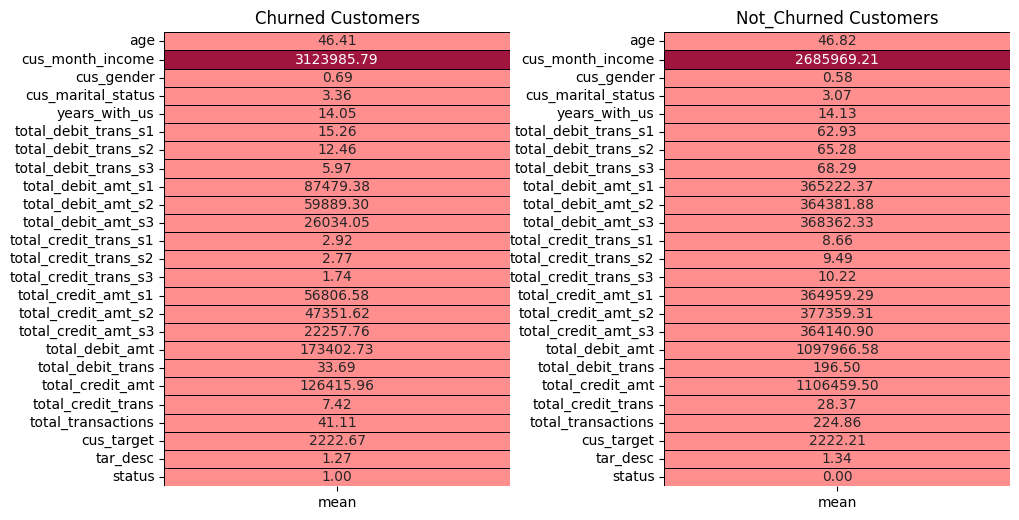

In [19]:
encoded_df.drop(['cus_dob', "cus_customer_since"], axis=1, inplace=True)
colors = ['#FF8E8F','#A0153E']

churn = encoded_df[encoded_df['status'] == 1].describe().T
not_churn = encoded_df[encoded_df['status'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.6,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.6,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)
fig.savefig(config.PLOT_FILES+f"Mean_values_features_churned_and_not_churned_customers.jpg", dpi=200)
plt.show()

<div style=" background-color:#31363F;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">

* Mean values of all the features for `churned` and `not-churned customers`.
* Clearly, the customers that `churned` had a low mean `total_debit_trans_s1, total_debit_trans_s2` of around 15 as compared to those who continued with an average of `65`.
  but one thing we can noticed to `total_debit_trans_s2` for `churn` which is very low `5.97` campared to `Non-churned-customer` which is significant high `68.29`.
* Same we can see with the total debit amount for s1,s2 and s3 also 
Mean values of OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport are higher for not-churned customers than churn customers. This can serve as a good indicator or point to focus on!
Churned customer's Contract value is much smaller than those of not-churned customers.
Mean MonthlyCharges of the churn customers, 74.44, is more than that of not-churn customers, 61.27.
Not-churned customers TotalCharges, 2557.31, is higher than churn customers, 1531.80.
From these mean values, we can say that some of the features display a clear cut difference that can help to focus more churn customers to make sure they retain the services.
The dataset has too many categorical features, hence mean values of the features are present in the vicinity of 0.
</div>

In [20]:
encoded_df.shape

(1249, 25)

## `Let's see how the distribution look for each features`

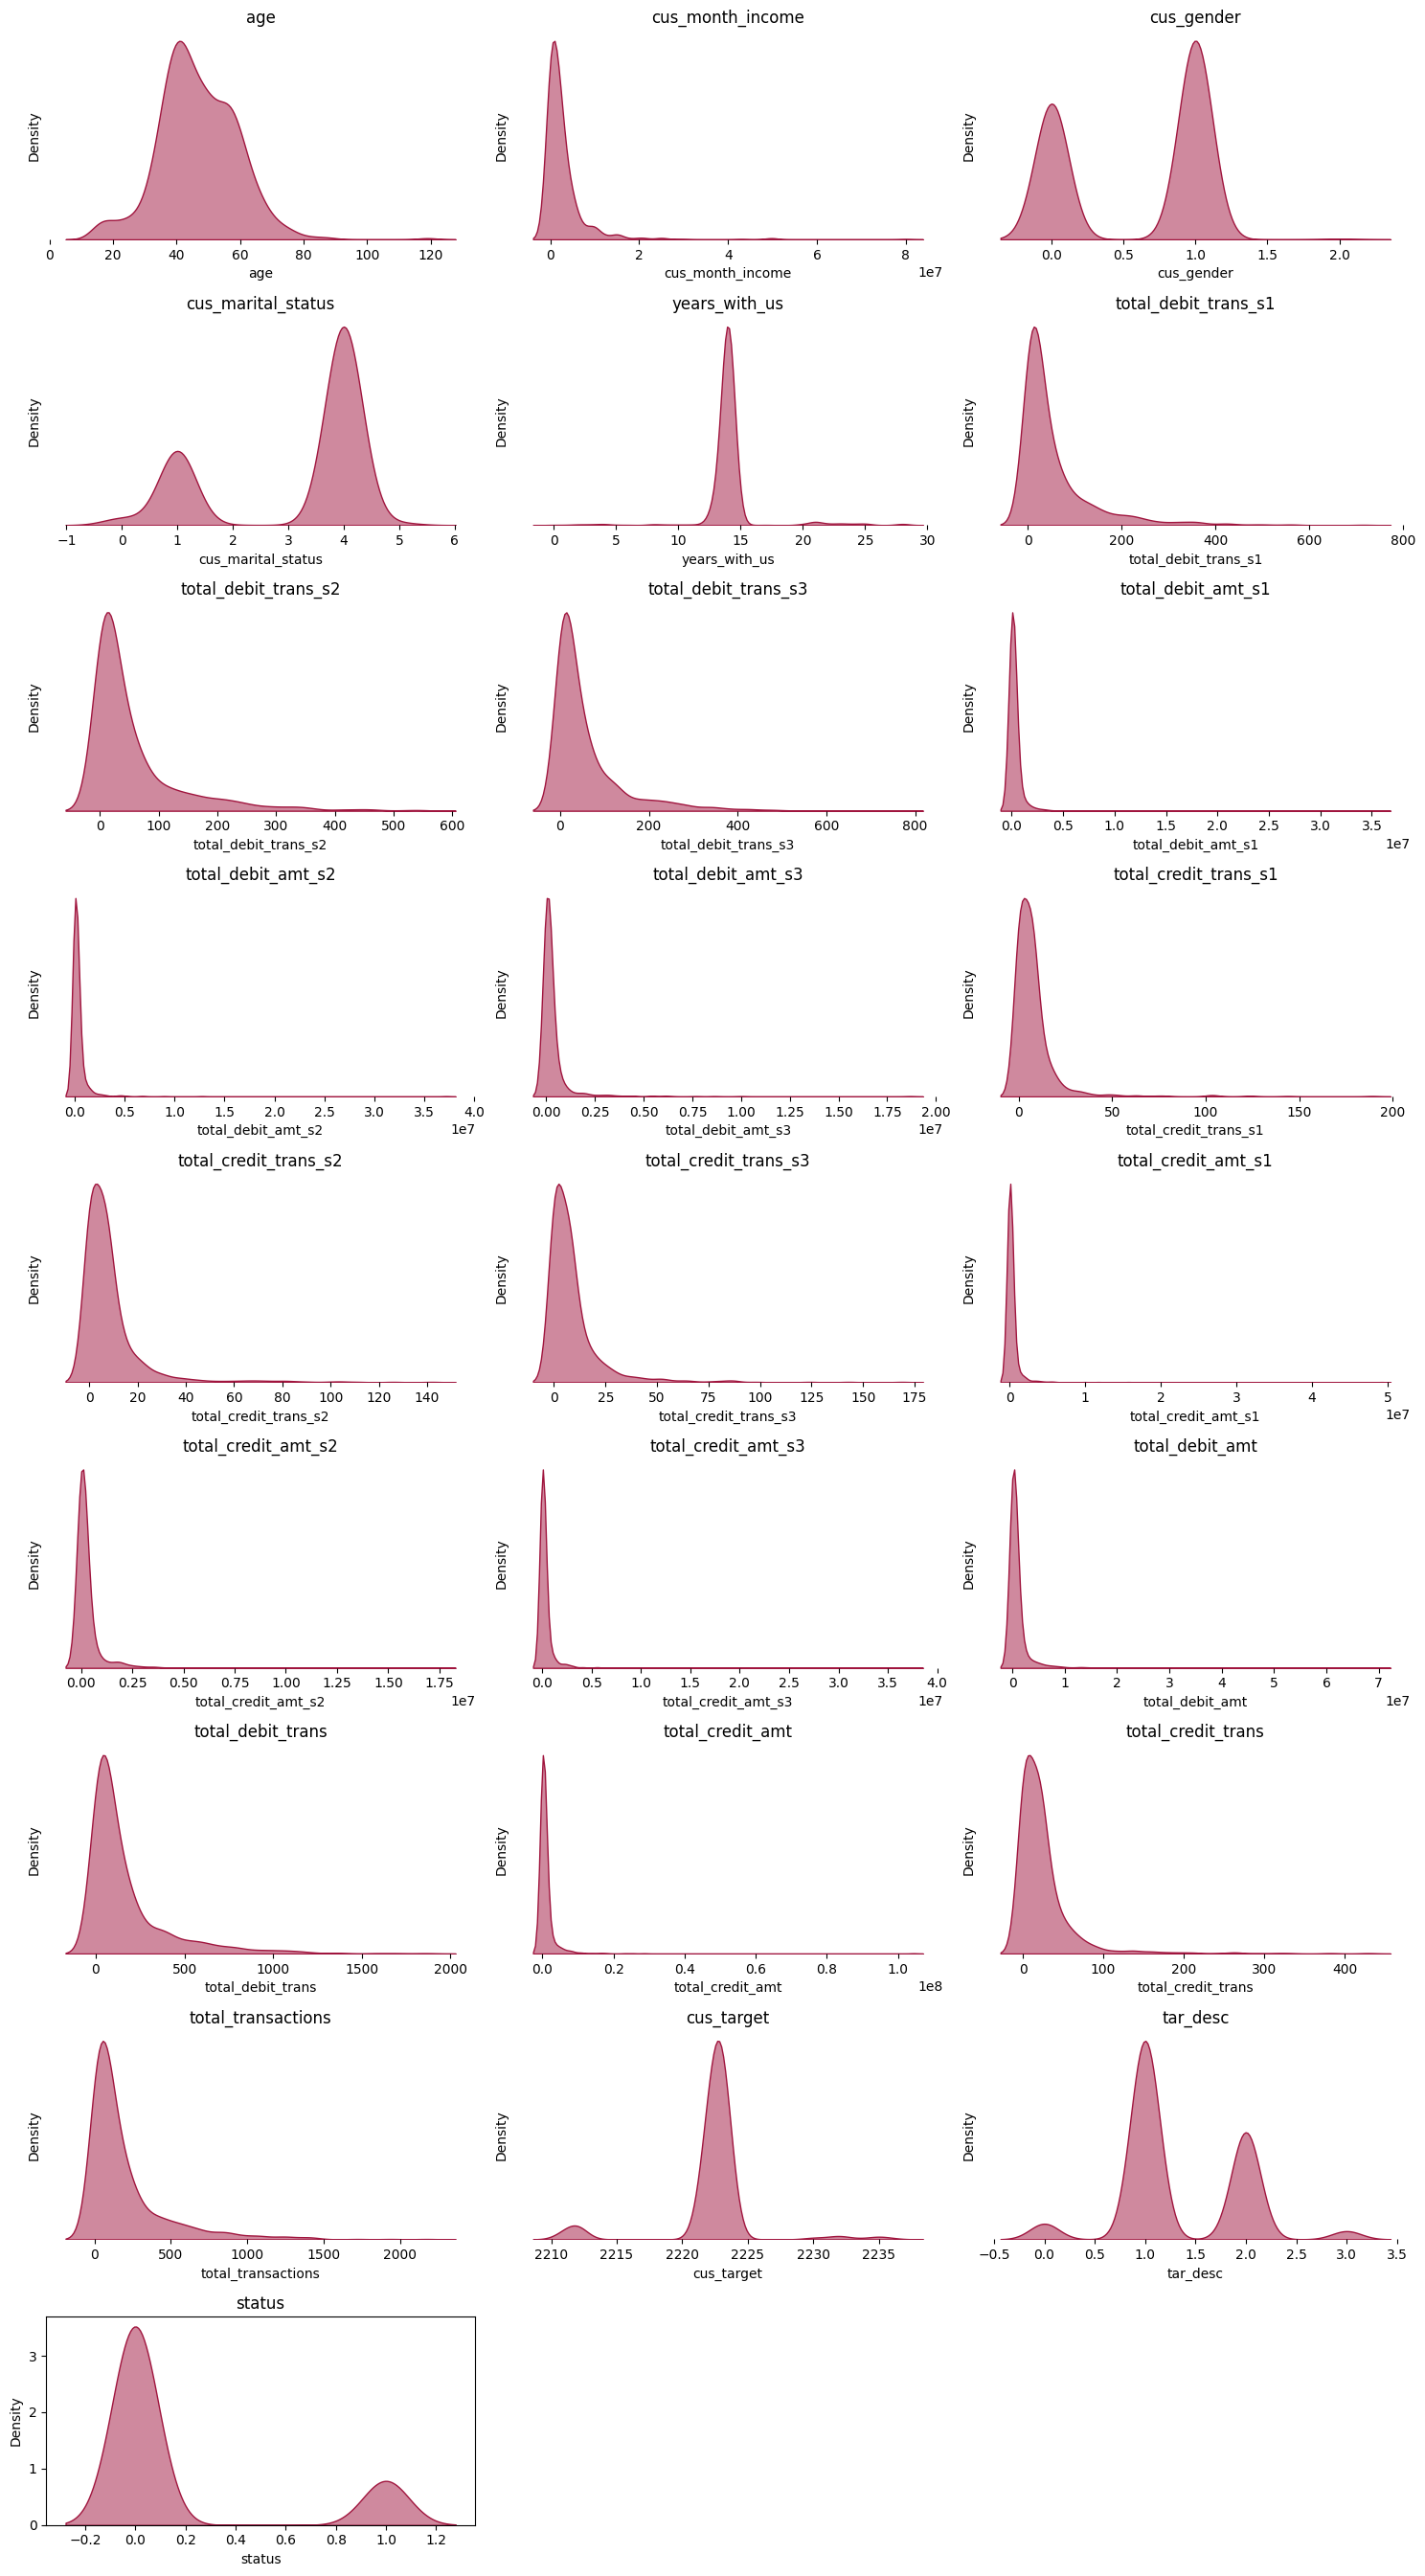

In [21]:
helper.plot_histogram(encoded_df)

### `Now let remove the outliers from our dataset and plot the distrubition`

In [22]:
cleaned_df = helper.remove_outliers_iqr(encoded_df, encoded_df.columns)
cleaned_df

Before outliers removing shape of data: (1249, 25)
After outliers removing shape of data: (569, 25)


,age,cus_month_income,cus_gender,cus_marital_status,years_with_us,total_debit_trans_s1,total_debit_trans_s2,total_debit_trans_s3,total_debit_amt_s1,total_debit_amt_s2,total_debit_amt_s3,total_credit_trans_s1,total_credit_trans_s2,total_credit_trans_s3,total_credit_amt_s1,total_credit_amt_s2,total_credit_amt_s3,total_debit_amt,total_debit_trans,total_credit_amt,total_credit_trans,total_transactions,cus_target,tar_desc,status
1,46,1500000.0,0,4,14,37,15,45,35372.55,20134.00,83856.67,2,4,4,10000.00,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,1,0
3,15,500.0,0,4,14,0,1,0,0.00,4000.00,0.00,5,4,3,30103.05,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,1,0
9,59,1500000.0,0,1,14,11,40,79,43400.00,128076.13,364208.55,0,5,7,0.00,130000.00,398046.93,535684.68,130,528046.93,12,142,2223,1,0
10,64,2800000.0,1,1,14,35,35,57,85600.00,90400.00,96200.00,6,7,18,83621.28,97558.16,89690.88,272200.00,127,270870.32,31,158,2223,1,0
12,51,1000000.0,1,4,14,32,10,22,77165.02,19400.00,53455.70,3,0,3,42633.40,0.00,12700.00,150020.72,64,55333.40,6,70,2222,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,16,1000000.0,1,4,14,4,0,0,11908.98,0.00,0.00,1,0,1,5800.00,0.00,5000.00,11908.98,4,10800.00,2,6,2223,1,0
1237,55,1000000.0,1,4,14,14,18,24,65100.00,70700.00,75100.00,7,6,7,65509.33,70663.32,74966.05,210900.00,56,211138.70,20,76,2223,1,0
1238,18,1500000.0,1,4,14,28,31,30,41300.00,29832.00,17453.60,7,15,14,20730.00,10950.00,8170.00,88585.60,89,39850.00,36,125,2223,1,0
1245,35,3500000.0,1,4,14,55,35,37,119297.02,118884.00,147554.88,7,6,9,114601.14,119137.62,440891.65,385735.90,127,674630.41,22,149,2222,2,0


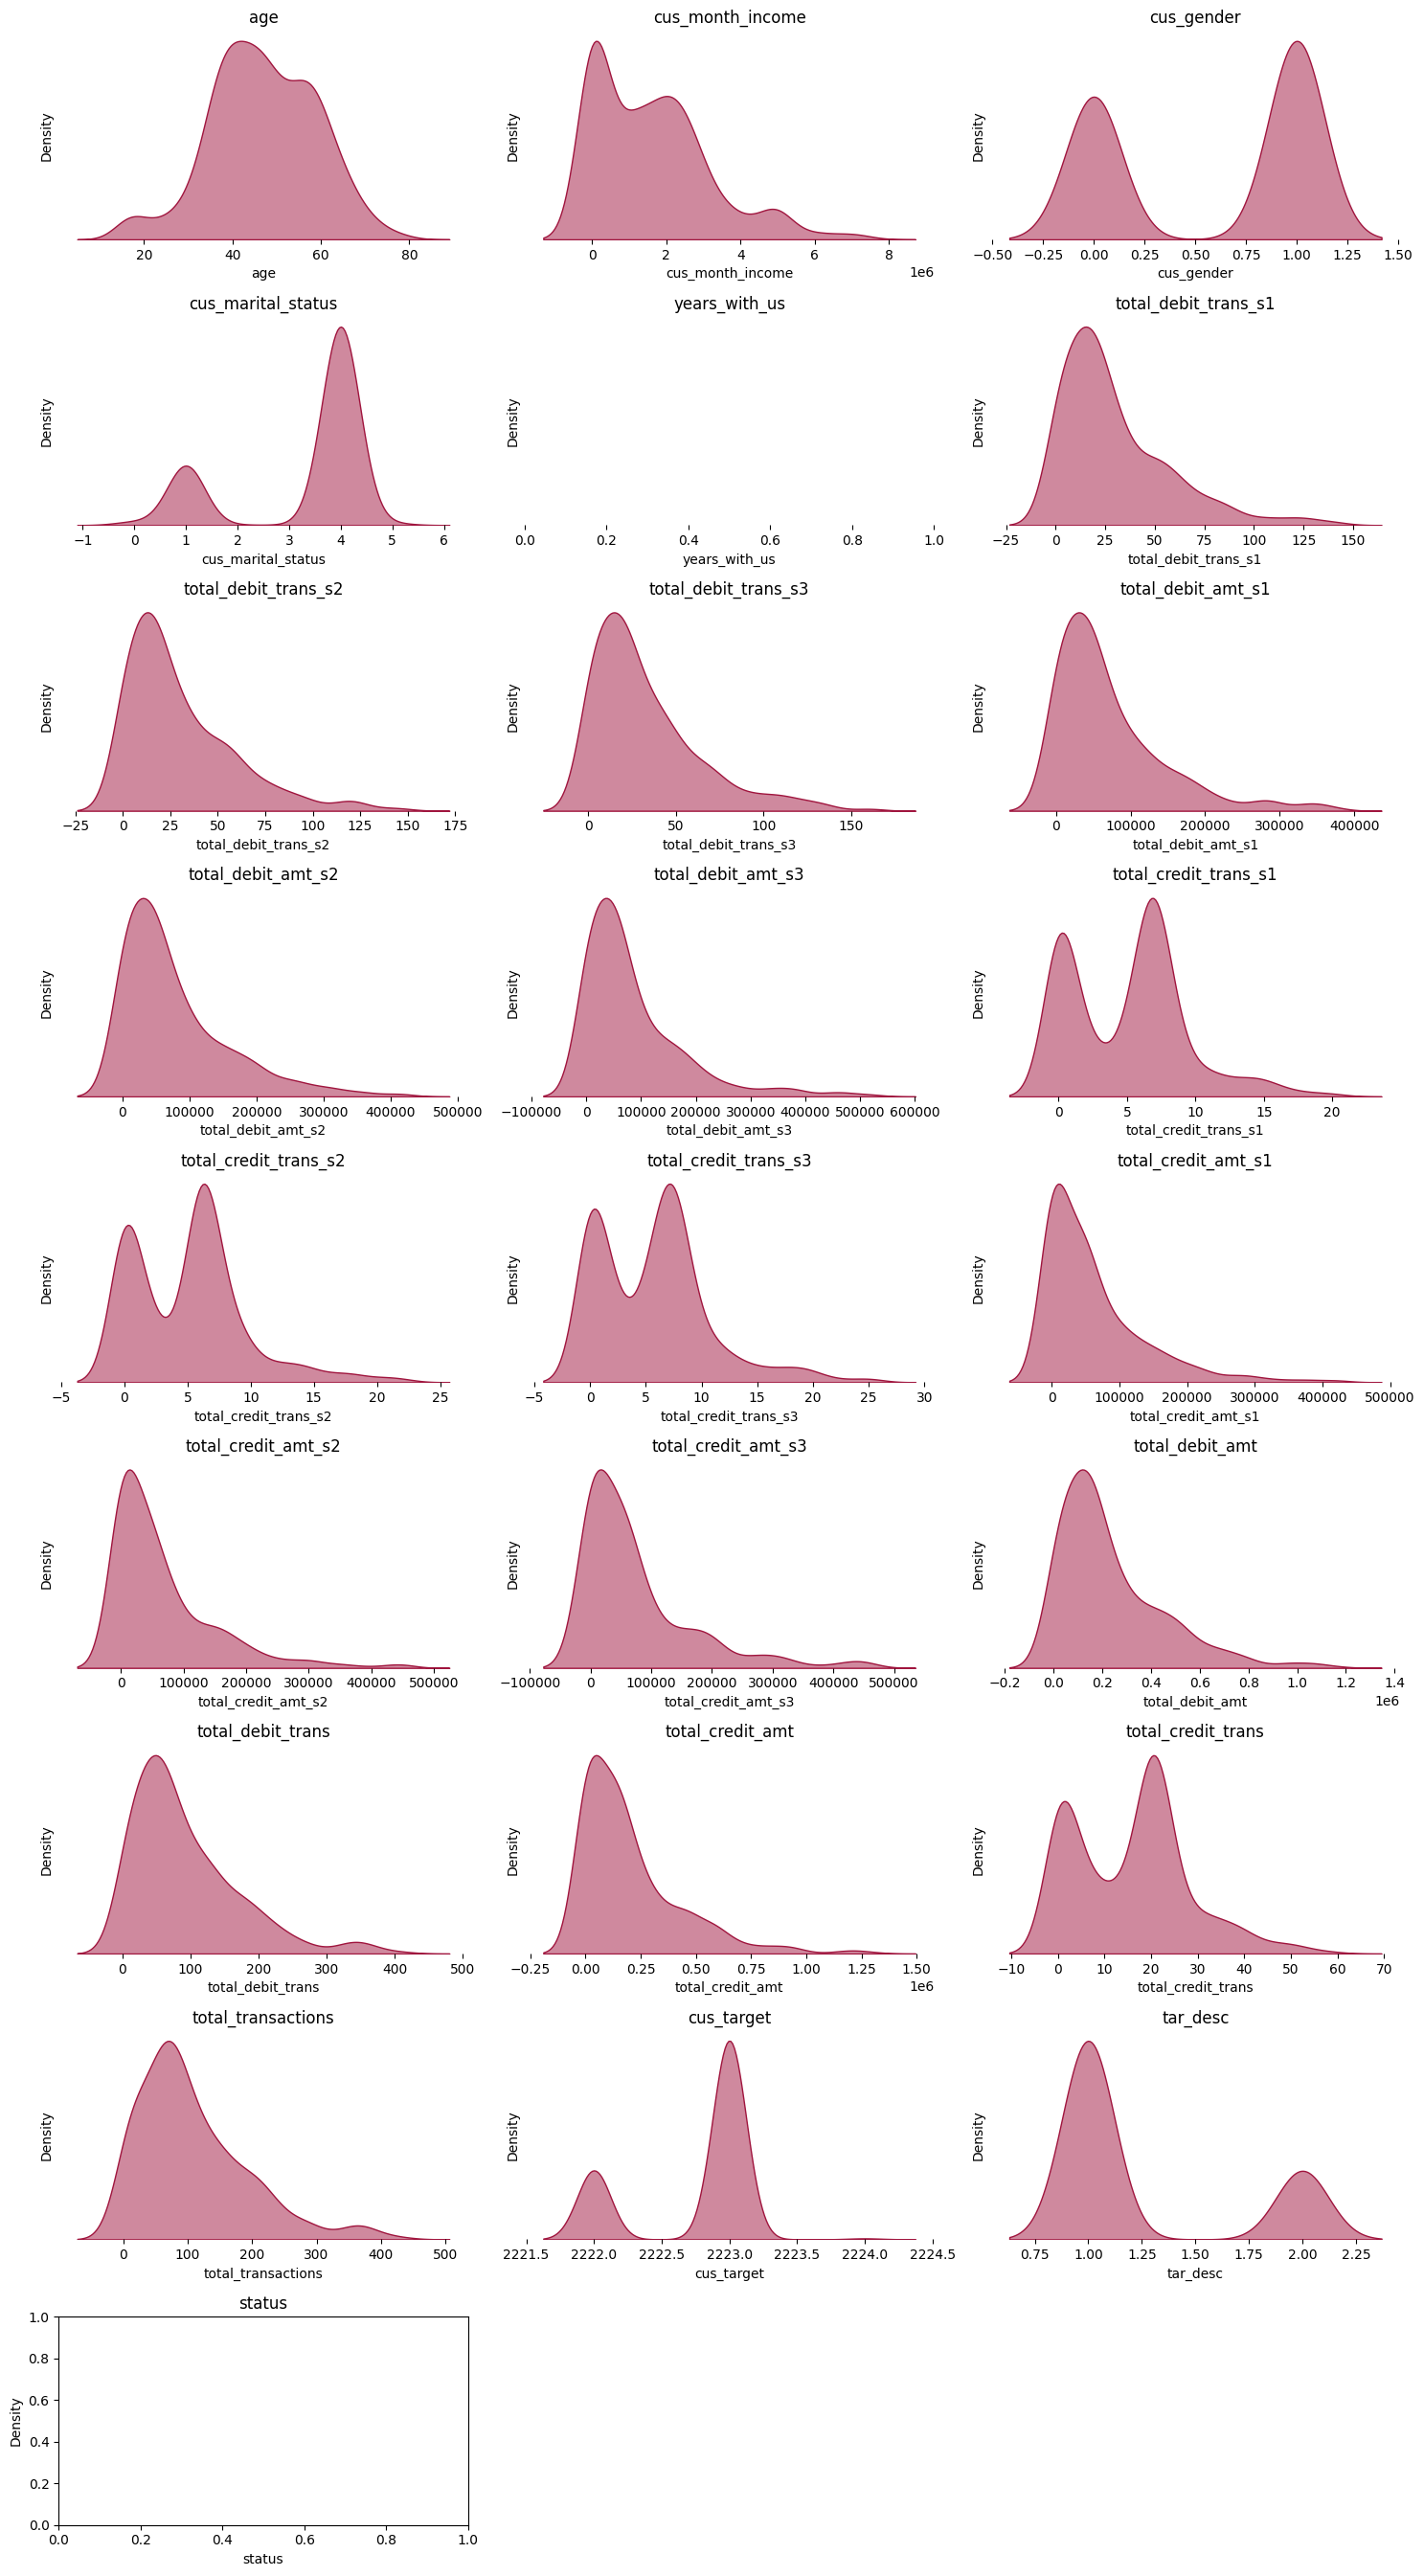

In [23]:
helper.plot_histogram(cleaned_df)

In [23]:
nums = encoded_df.select_dtypes(include='number')
# Checking if any number feature is categorical in nature or not
num_cols = []
for f in nums:
    if nums[f].nunique() > 8:
        num_cols.append(f)


In [24]:
num_cols

['age',
 'cus_month_income',
 'years_with_us',
 'total_debit_trans_s1',
 'total_debit_trans_s2',
 'total_debit_trans_s3',
 'total_debit_amt_s1',
 'total_debit_amt_s2',
 'total_debit_amt_s3',
 'total_credit_trans_s1',
 'total_credit_trans_s2',
 'total_credit_trans_s3',
 'total_credit_amt_s1',
 'total_credit_amt_s2',
 'total_credit_amt_s3',
 'total_debit_amt',
 'total_debit_trans',
 'total_credit_amt',
 'total_credit_trans',
 'total_transactions',
 'cus_target']

In [60]:
from scipy.stats import skew
skew(df[num_cols[1]].dropna())

6.304919849705567

In [71]:
target_enc = {
    'ACTIVE' : 0,
    "CHURN" : 1
}
df.loc[:, 'Status'] = df['Status'].map(target_enc)

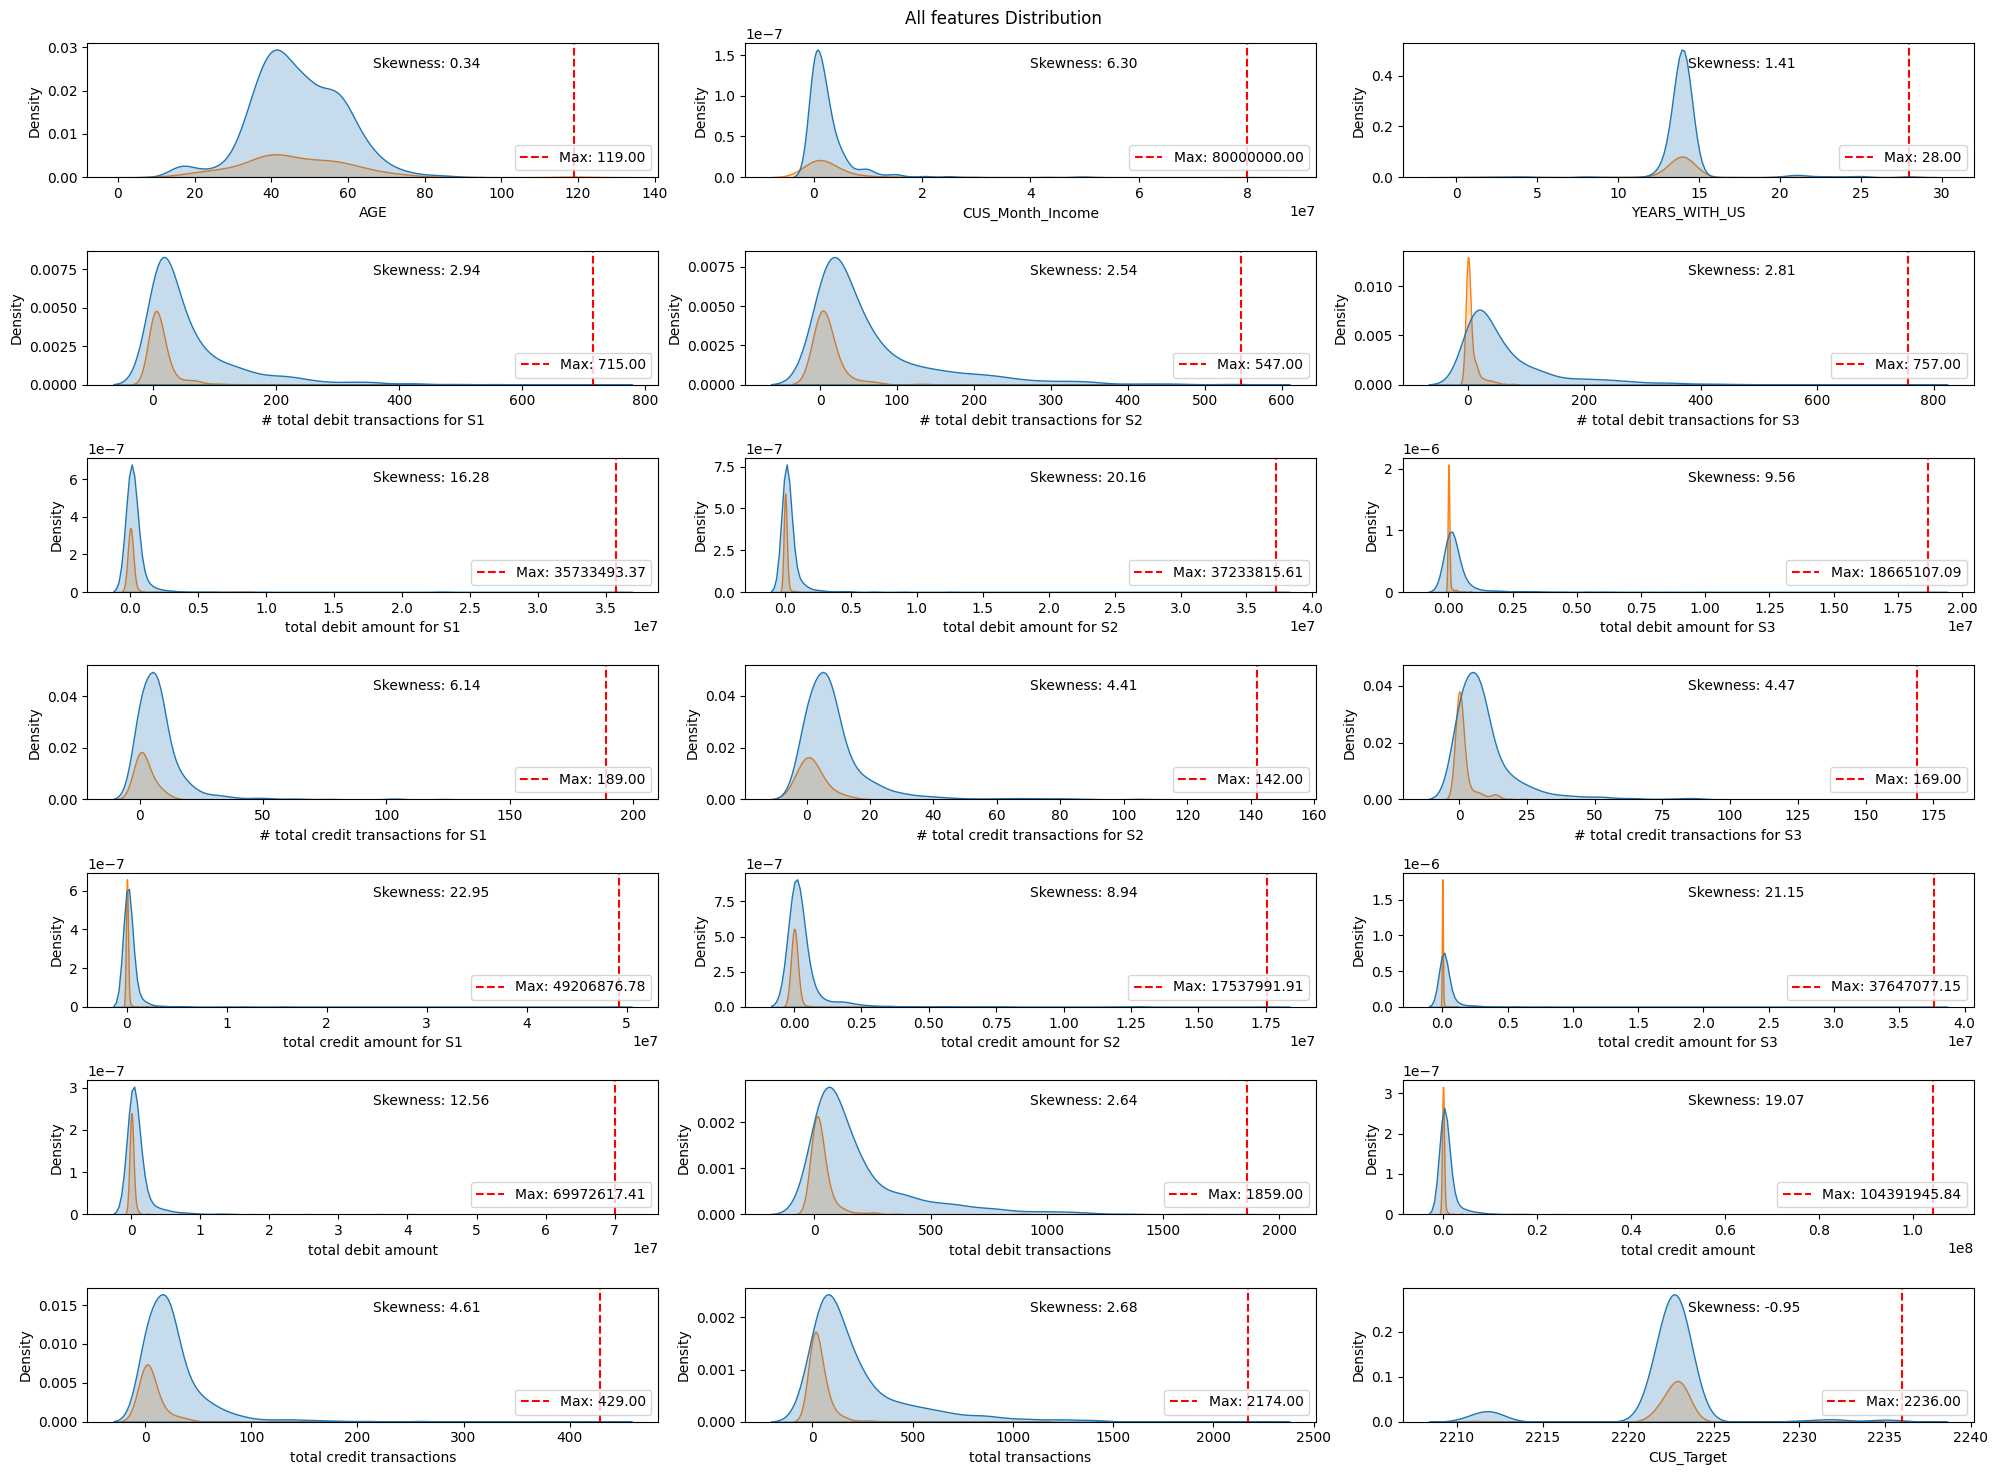

In [74]:

plt.figure(figsize=(20, 15))
for i in range(0, len(num_cols)):
    plt.subplot(7, 3,  i+1)
    sns.kdeplot(x = df[num_cols[i]], fill=True, color=colours, hue=df['Status'])
    max_value = df[num_cols[i]].max()


    skewness = skew(df[num_cols[i]].dropna())
    plt.text(0.5, 0.9, f'Skewness: {skewness:.2f}', 
                        transform=plt.gca().transAxes, 
                        fontsize=10, 
                        verticalalignment='top'
            )
    plt.axvline(x=max_value, 
                color='red', 
                linestyle='--',
                  label=f'Max: {max_value:.2f}')
    plt.xlabel(num_cols[i])
    plt.legend(loc='lower right')
    plt.suptitle('All features Distribution')
plt.tight_layout()
plt.show()